## Model Selection and Results
The objective of this analysis is to build a predictive model that determines whether a customer will submit a claim during their policy period. This binary classification task utilizes automobile insurance data to identify key factors influencing claim submission.

### 1. Training and evaluation

In [1]:
import pandas as pd
from claim_prediction import claim_prediction

input_path = "data/claims_dummy_data.csv"
save_dir = "output"

all_results = []
for balance_strategy in [None, 'class_weight', 'SMOTE']:
    print(f'\n---> Balance strategy "{balance_strategy}"')
    for outlier_strategy in [None]:  #, "cap", "remove"]:
        outlier_boundary_method = "IQR" if outlier_strategy is not None else None
        print(f'\n---> Outlier handling "{outlier_strategy}" with boundary method "{outlier_boundary_method}"')
        _, results_df = claim_prediction(input_path, 
                                        balance_strategy=balance_strategy,
                                        outlier_strategy=outlier_strategy, 
                                        outlier_boundary_method=outlier_boundary_method)
        results_df['balance_strategy'] = balance_strategy
        results_df['outlier_strategy'] = outlier_strategy
        all_results.append(results_df) 
                      
all_results_df = pd.concat(all_results)
all_results_df.to_csv(f"{save_dir}/all_results.csv", index=False)
all_results_df


---> Balance strategy "None"

---> Outlier handling "None" with boundary method "None"


2024-10-28 16:37:15 - INFO - X: (382154, 9), y: (382154,)
2024-10-28 16:37:15 - INFO - Train: (305724, 9), (305724,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-28 16:37:15 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/logistic_regression_model.pkl
2024-10-28 16:37:15 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/logistic_regression_results.json
2024-10-28 16:37:15 - INFO - Loading linear_svc model from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/linear_svc_model.pkl
2024-10-28 16:37:15 - INFO - Loading linear_svc model results from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/linear_svc_results.json
2024-10-28 16:37:15 - INFO - Loading mlp model from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/mlp_model


---> Balance strategy "class_weight"

---> Outlier handling "None" with boundary method "None"


2024-10-28 16:37:18 - INFO - X: (382154, 9), y: (382154,)
2024-10-28 16:37:18 - INFO - Train: (305724, 9), (305724,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-28 16:37:18 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-class_weight_outliers-None-None_seed-42/logistic_regression_model.pkl
2024-10-28 16:37:18 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-class_weight_outliers-None-None_seed-42/logistic_regression_results.json
2024-10-28 16:37:18 - INFO - Loading linear_svc model from cache: output/claims_dummy_data-0.1_balance-class_weight_outliers-None-None_seed-42/linear_svc_model.pkl
2024-10-28 16:37:18 - INFO - Loading linear_svc model results from cache: output/claims_dummy_data-0.1_balance-class_weight_outliers-None-None_seed-42/linear_svc_results.json
2024-10-28 16:37:18 - WARNING - Class weights are not supported for mlp, skipping.
2024-10-28 16:37:18 - 


---> Balance strategy "SMOTE"

---> Outlier handling "None" with boundary method "None"


2024-10-28 16:37:19 - INFO - X: (382154, 9), y: (382154,)
/Users/saeed/projects/claim_prediction/.venv/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
2024-10-28 16:37:20 - INFO - X (balanced): (639106, 9), y (balanced): (639106,)
2024-10-28 16:37:20 - INFO - Train: (511286, 9), (511286,) | Validation: (63910, 9), (63910,) | Test: (63910, 9), (63910,)
2024-10-28 16:37:20 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-SMOTE_outliers-None-None_seed-42/logistic_regression_model.pkl
2024-10-28 16:37:20 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-SMOTE_outliers-None-None_seed-42/logistic_regression_results.json
2024-10-28 16:37:20 - INFO - Loading linear_svc model from cache: 

,model,best_params,ranked_features,best_threshold,best_score,training_time,precision,recall,f1,roc_auc,inference_time,ranked_pfi,results_save_path,model_save_path,balance_strategy,outlier_strategy
0,logistic_regression,"{'C': 100, 'max_iter': 3000, 'penalty': 'l2', ...","{'Previously_Insured': -4.233802220458085, 'Pr...",0.286422,0.562796,45.43,42.86,81.44,56.16,86.55,0.00,{'Previous_Vehicle_Damage': 0.1636372369488136...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
1,linear_svc,{'C': 1},"{'Previously_Insured': -0.6553982617507699, 'P...",0.248465,0.563149,0.52,42.73,81.71,56.11,86.52,0.00,{'Previous_Vehicle_Damage': 0.1489852132706219...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
2,mlp,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",None,0.264083,0.589899,55.87,45.80,82.00,58.77,88.68,0.09,{'Previous_Vehicle_Damage': 0.1748261019075424...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
3,random_forest,"{'bootstrap': True, 'max_depth': None, 'max_fe...","{'Annual_Premium': 0.2856152432559418, 'Previo...",0.260031,0.584716,16.98,45.89,79.71,58.25,88.42,0.45,{'Previous_Vehicle_Damage': 0.1689313147589486...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
4,xgboost,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",{'Previous_Vehicle_Damage': 0.7154749631881714...,0.343562,0.610436,2.56,49.74,78.63,60.93,89.51,0.09,{'Previous_Vehicle_Damage': 0.1862094589898444...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
5,stacking,None,None,0.253010,0.609994,0.54,48.55,81.31,60.80,89.39,0.52,{'Previous_Vehicle_Damage': 0.1828244166413860...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
0,logistic_regression,"{'C': 100, 'max_iter': 3000, 'penalty': 'l2', ...","{'Previously_Insured': -4.8398638291250755, 'P...",0.682222,0.564336,129.69,43.13,80.80,56.24,86.52,0.00,"{'Previous_Vehicle_Damage': 0.164680797937036,...",output/claims_dummy_data-0.1_balance-class_wei...,output/claims_dummy_data-0.1_balance-class_wei...,class_weight,None
1,linear_svc,{'C': 1},"{'Previously_Insured': -1.1628330510641811, 'P...",0.277076,0.562945,0.64,42.50,82.86,56.18,86.53,0.00,{'Previous_Vehicle_Damage': 0.1619559757613449...,output/claims_dummy_data-0.1_balance-class_wei...,output/claims_dummy_data-0.1_balance-class_wei...,class_weight,None
2,random_forest,"{'bootstrap': True, 'max_depth': 18, 'max_feat...",{'Previous_Vehicle_Damage': 0.3592665227839676...,0.635961,0.601773,15.17,48.05,79.98,60.03,89.19,0.31,{'Previous_Vehicle_Damage': 0.1815486578074580...,output/claims_dummy_data-0.1_balance-class_wei...,output/claims_dummy_data-0.1_balance-class_wei...,class_weight,None
3,xgboost,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",{'Previous_Vehicle_Damage': 0.5038515329360962...,0.672121,0.608990,3.06,48.60,80.65,60.65,89.48,0.11,{'Previous_Vehicle_Damage': 0.1828017671345243...,output/claims_dummy_data-0.1_balance-class_wei...,output/claims_dummy_data-0.1_balance-class_wei...,class_weight,None


### 2. Plot Model Performance (ROC AUC and F1 Score)

In [ ]:
models = {
    'logistic_regression': 'Logistic Regression',
    'linear_svc': 'Linear SVC',
    'mlp': 'MLP',
    'random_forest': 'Random Forest',
    'xgboost': 'XGBoost', 
    'stacking': 'Stacking Ensemble',
    
}
all_results_df['model'] = all_results_df['model'].map(models)

balance_strategies = {
    None: 'None',
    'class_weight': 'Class Weight',
    'SMOTE': 'SMOTE',
    'ADASYN': 'ADASYN',
}
all_results_df['balance_strategy'] = all_results_df['balance_strategy'].map(balance_strategies)

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_88603/2476126241.py:26: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)


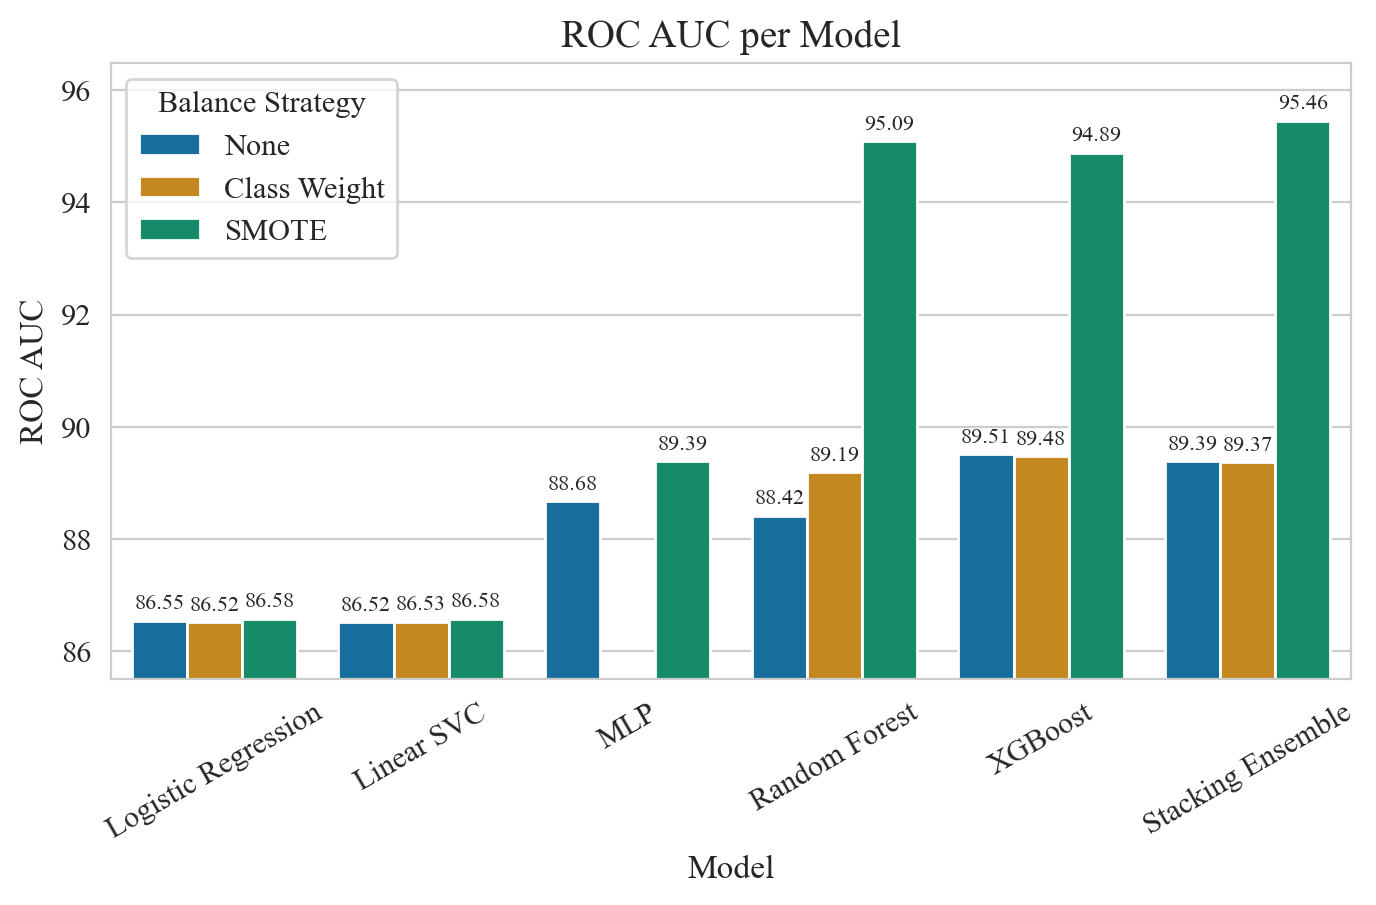

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_88603/2476126241.py:26: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)


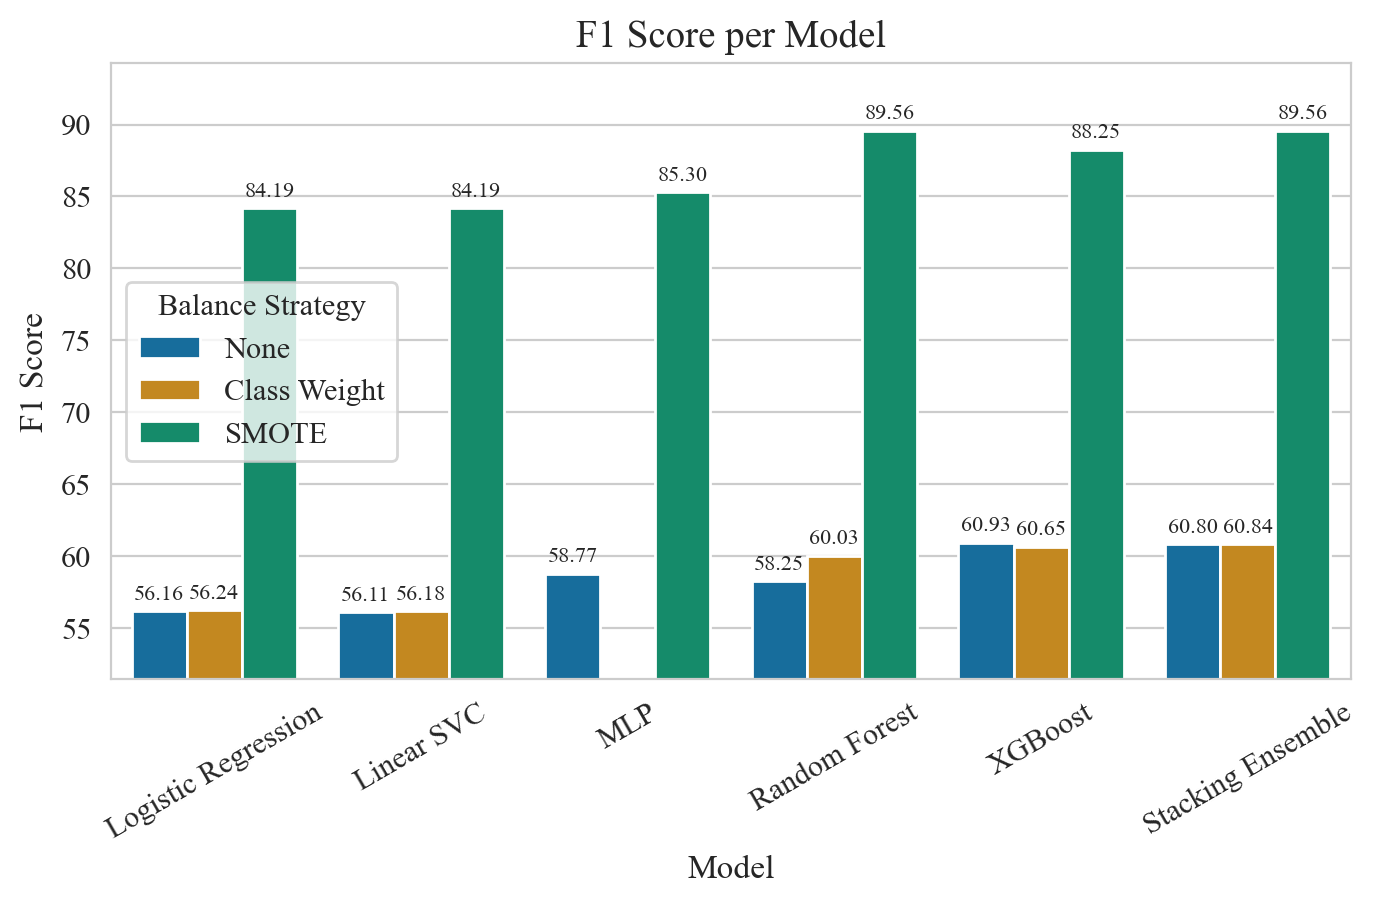

In [3]:
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
import seaborn as sns


sns.set_style("whitegrid")

plt.rcParams.update({
    'font.family': 'Times New Roman',  #'Arial',  # or 'Helvetica', 'Times New Roman'
    'font.size': 12,  # General font size
    'axes.titlesize': 14,  # Font size for titles
    'axes.labelsize': 12,  # Font size for axis labels
    'xtick.labelsize': 11,  # Font size for x-tick labels
    'ytick.labelsize': 11,   # Font size for y-tick labels
    'legend.fontsize': 11,   # Font size for legend
    'legend.title_fontsize': 11   # Font size for legend title
})


def barplot_results(results_df, y='roc_auc', hue='balance_strategy'):
    # Set the style and color palette for Seaborn
    palette = sns.color_palette("colorblind", len(results_df['model'].unique()))  # Use a different color per model

    # Create the plot
    plt.figure(figsize=(8, 4), dpi=200)
    barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)
    hue_label = {'balance_strategy': 'Balance Strategy', 'outlier_strategy': 'Outlier Strategy'}[hue]
    plt.legend(title=hue_label)
    
    # Set title and labels
    y_label = {
        'roc_auc': 'ROC AUC', 'f1': 'F1 Score', 'precision': 'Precision', 'recall': 'Recall', 'accuracy': 'Accuracy', 
        'training_time': 'Training Time', 'inference_time': 'Inference Time'
    }[y]
    plt.title(f"{y_label} per Model")
    plt.xticks(rotation=30)
    plt.xlabel("Model")
    plt.ylabel(y_label)

    # Adjust the y-axis to make performance differences more visible
    y_margin = results_df[y].std() / 3
    y_min = results_df[y].min() - y_margin
    y_max = results_df[y].max() + y_margin
    plt.ylim(y_min, y_max)

    # Annotate each bar with the corresponding value
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'),  # Format the value with 4 decimal places
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text at the center of each bar
                        ha = 'center', va = 'center',  # Center alignment
                        xytext = (0, 6),  # Distance from the bar
                        textcoords = 'offset points', fontsize=8)  # Set text size

    # Show the plot
    plt.show()
    

barplot_results(all_results_df, y='roc_auc')
barplot_results(all_results_df, y='f1')

### 3. Runtime Comparison

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_88603/2476126241.py:26: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)


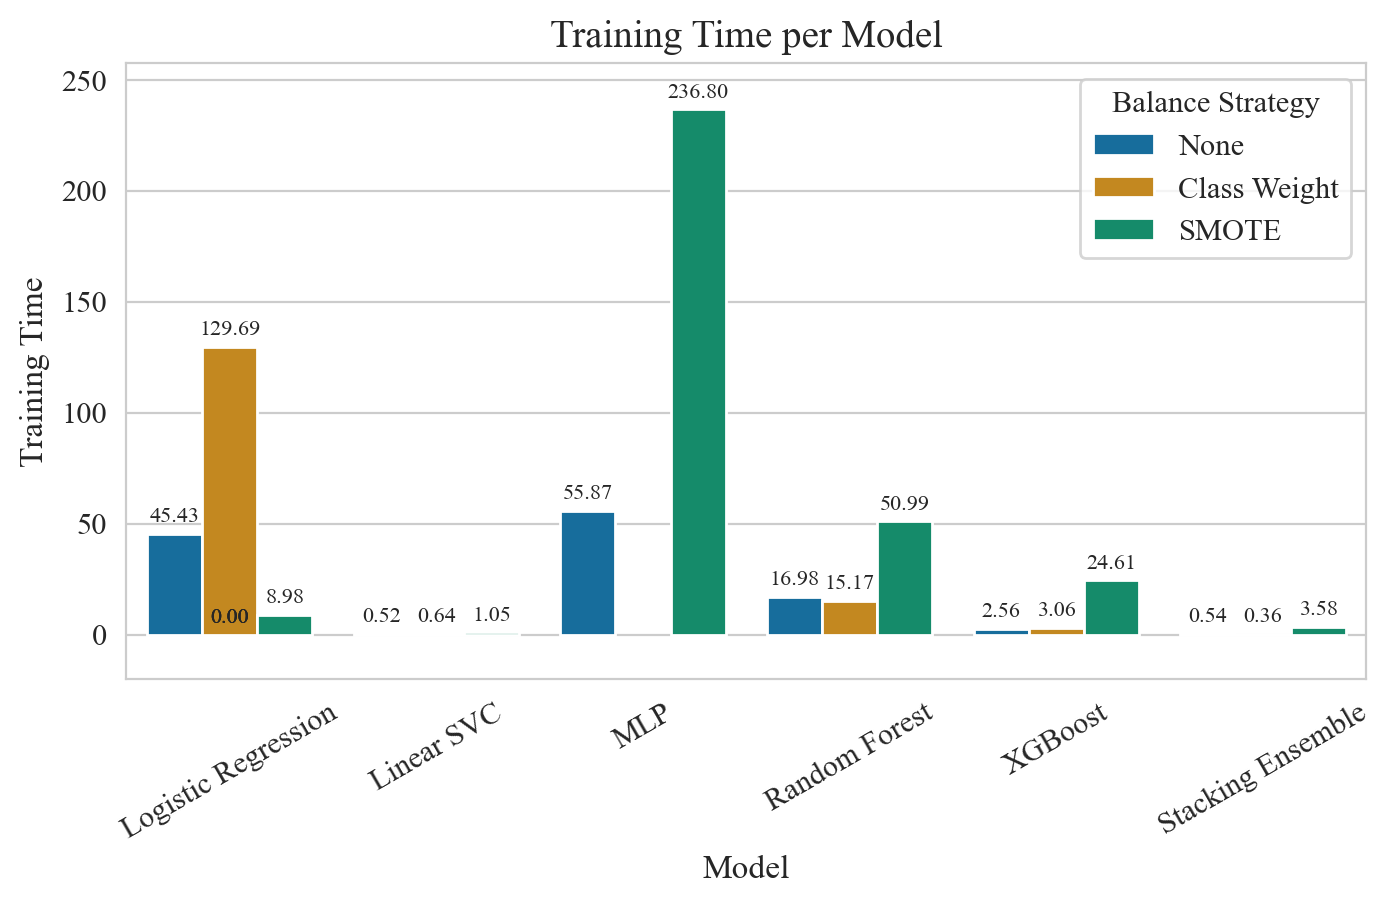

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_88603/2476126241.py:26: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)


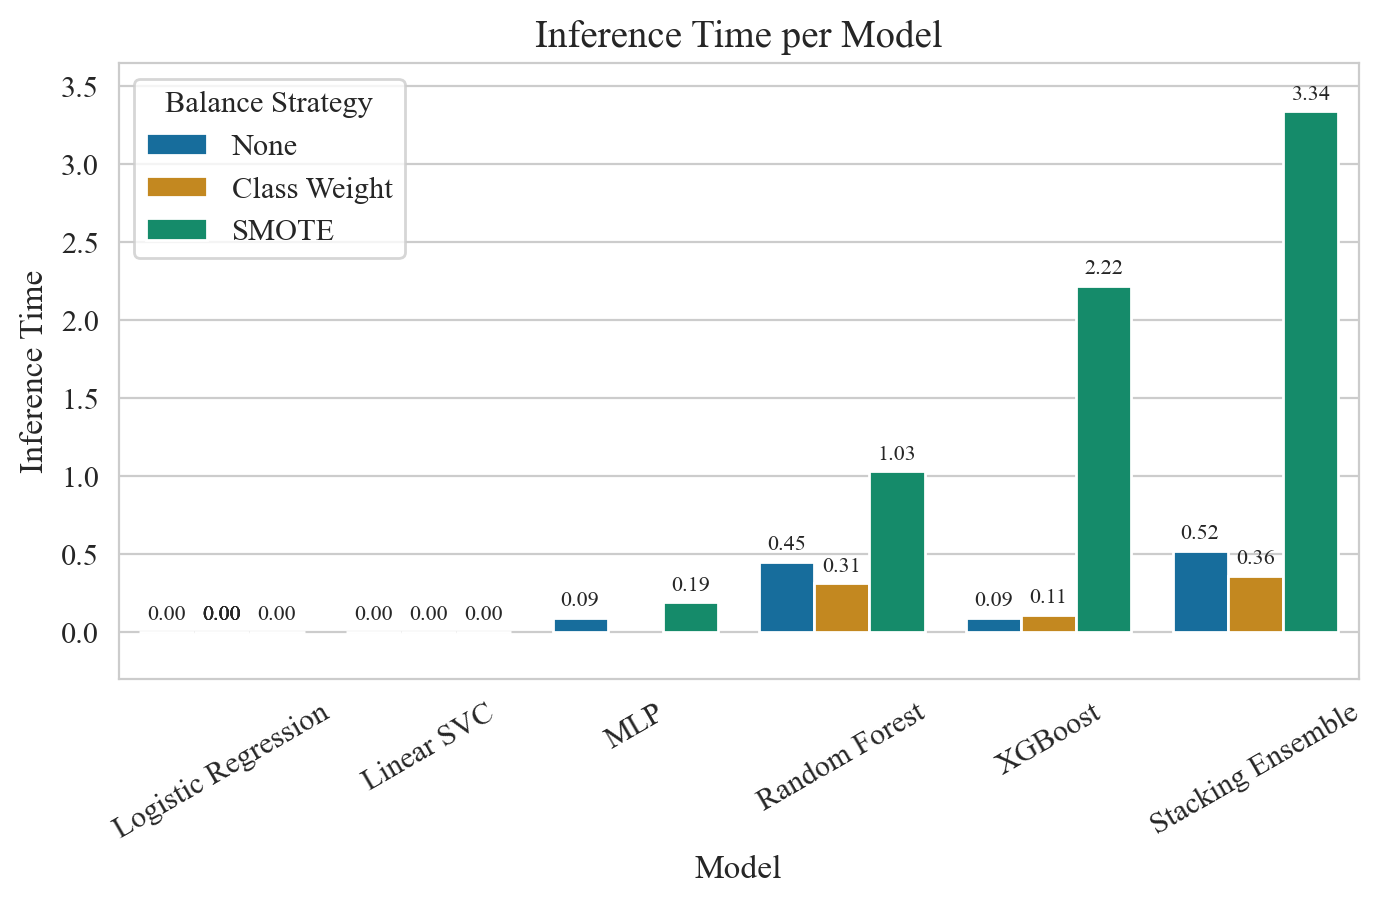

In [4]:
barplot_results(all_results_df, y='training_time')
barplot_results(all_results_df, y='inference_time')

### 4. Feature Importance

In [5]:
imbalanced_results_df = all_results_df[all_results_df['balance_strategy'] == 'None']

#### 4.1. Model-specific Ranked Features

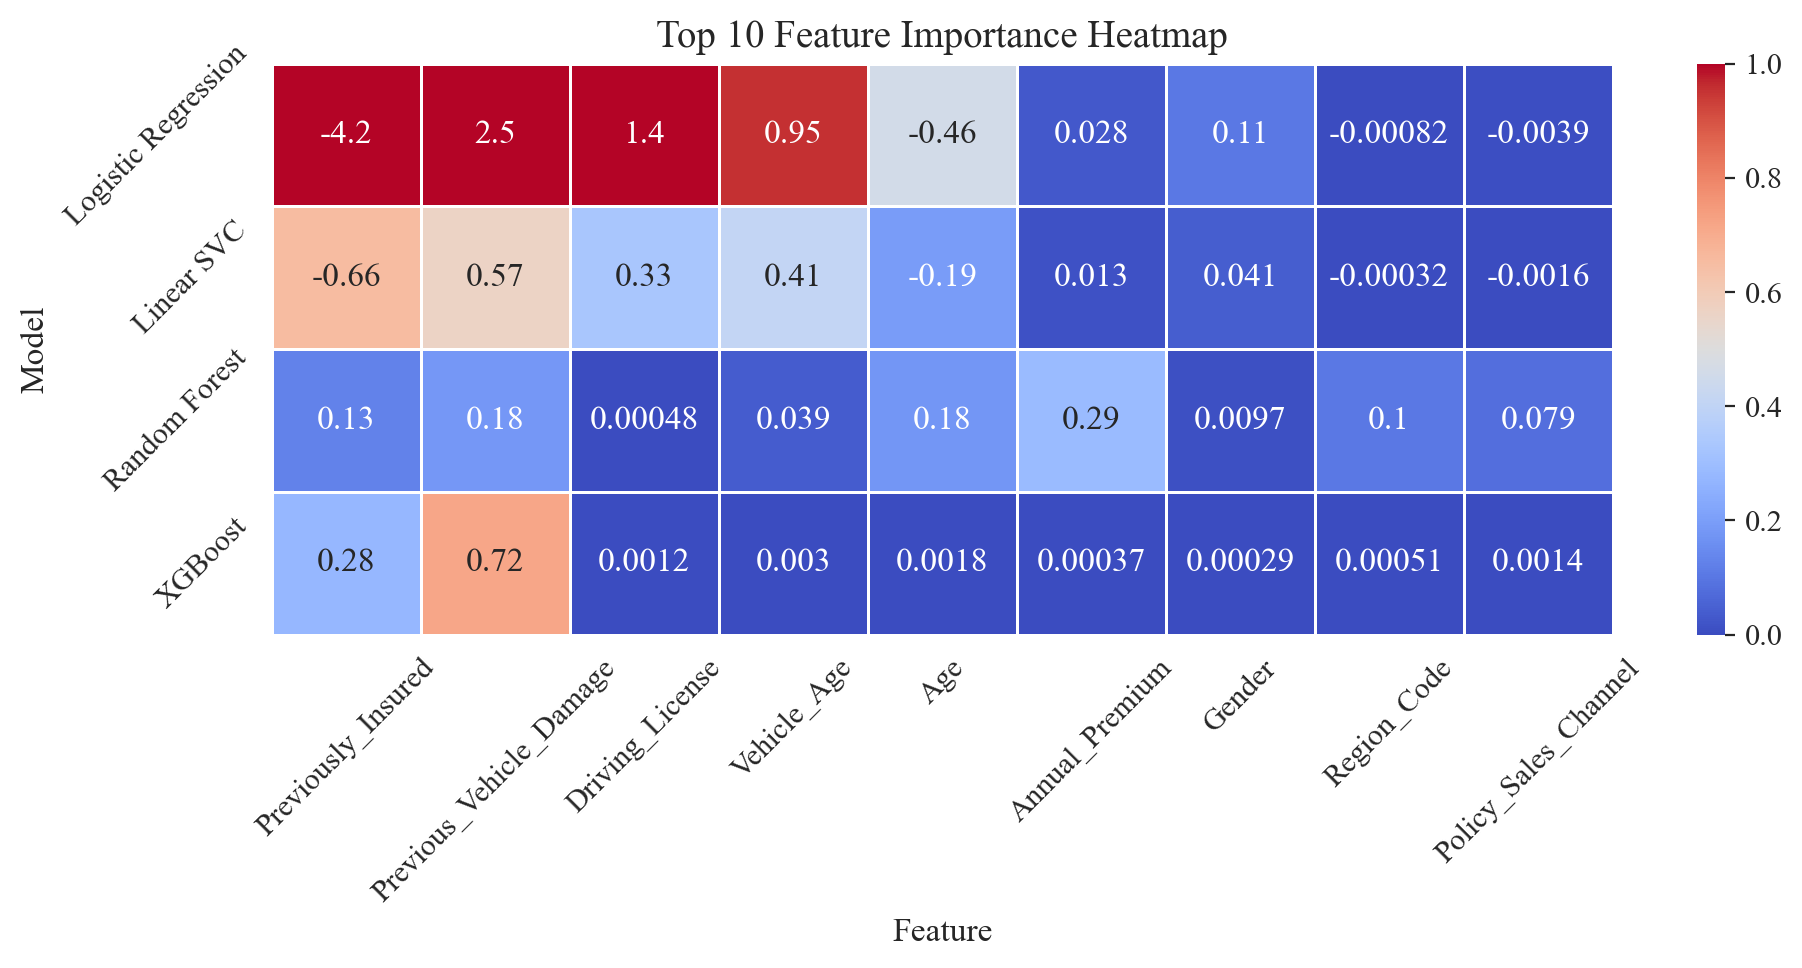

In [15]:
def plot_feature_importance_heatmap(results_df, features_col='ranked_pfi', top_n=10):
    # Extract feature importance dictionaries from the DataFrame
    results_df = results_df[results_df[features_col].notnull()]
    feature_importances = pd.DataFrame(results_df[features_col].tolist(), index=results_df['model'])
    feature_importances = feature_importances.fillna(0)
    
    # Select the top N features based on mean importance
    mean_importance = feature_importances.abs().mean(axis=0)
    top_features = mean_importance.nlargest(top_n).index
    top_feature_importances = feature_importances[top_features]

    # Plot the heatmap
    n_models = len(feature_importances)
    plt.figure(figsize=(top_n * 1, n_models * 1.25), dpi=200)
    
    if features_col == 'ranked_pfi':
        sns.heatmap(top_feature_importances, annot=True, cmap='coolwarm', linewidths=0.5)
    else:
        sns.heatmap(top_feature_importances.abs(), annot=top_feature_importances, vmin=0, vmax=1, cmap='coolwarm', linewidths=0.5)
    
    plt.title(f'Top {top_n} Feature Importance Heatmap')
    plt.xlabel('Feature')
    plt.xticks(rotation=45)
    plt.ylabel('Model')
    plt.yticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    

plot_feature_importance_heatmap(imbalanced_results_df, features_col='ranked_features')

#### 4.2. PFI Ranked Features

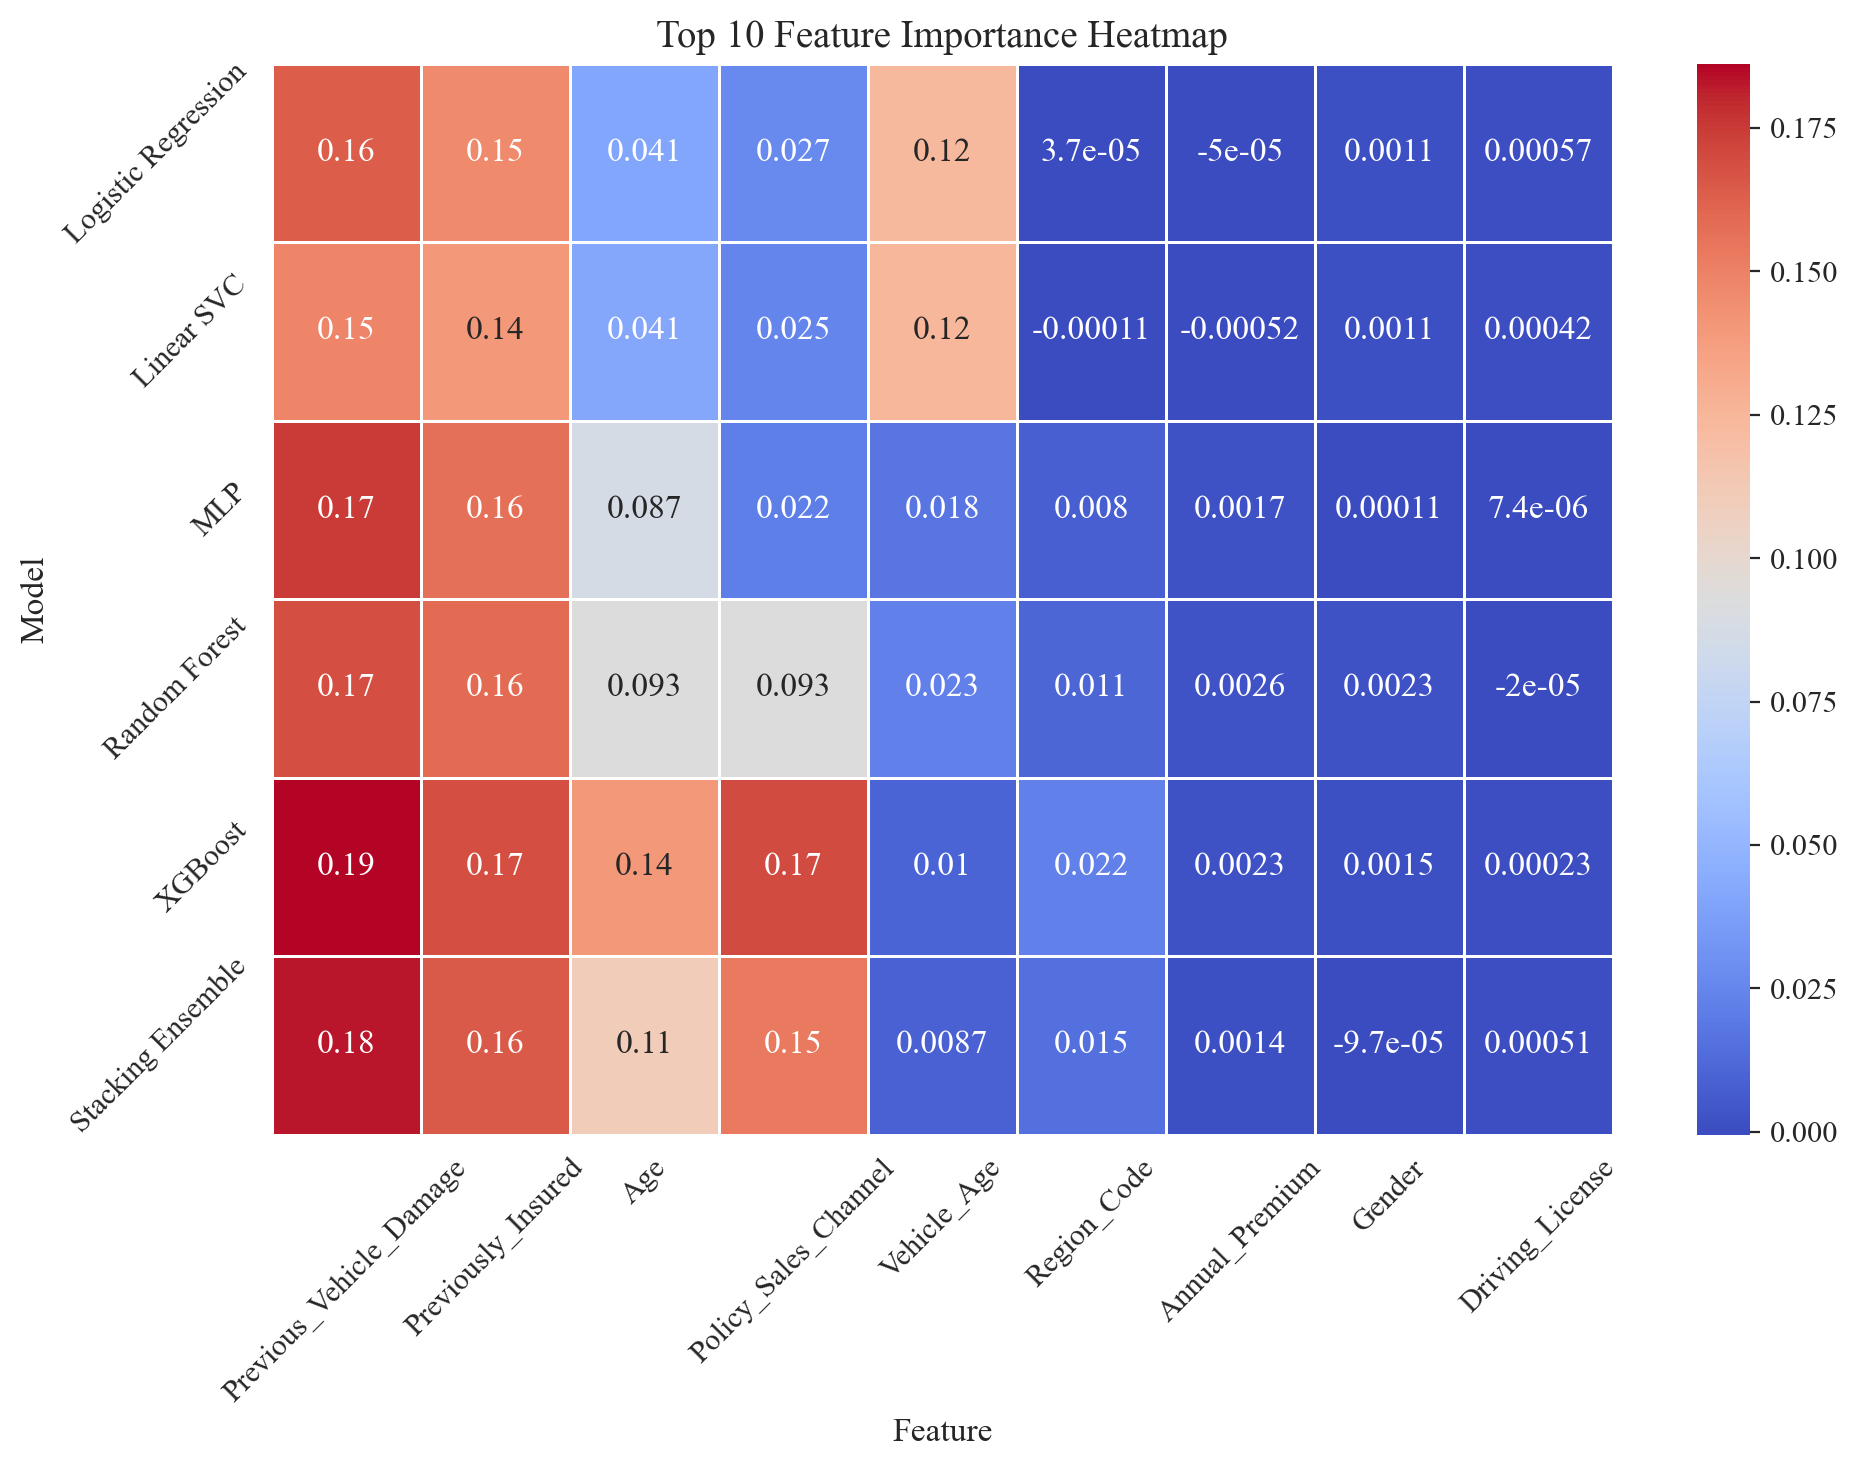

In [16]:
plot_feature_importance_heatmap(imbalanced_results_df, features_col='ranked_pfi')